In [2]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'acaf10f0-1f31-468d-b0e6-d10dbc215135',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

    #NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

{'status': {'timestamp': '2025-01-17T01:16:17.265Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 10656}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11868, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [4]:
type(data)

dict

In [4]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11868,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.981112e+07,1.981112e+07,False,NaN,1,None,None,None,2025-01-17T01:14:00.000Z,100065.579660,5.149295e+10,-13.1907,-0.258655,0.123703,7.791416,-5.875172,11.008280,46.237830,1.982411e+12,56.2984,2.101377e+12,None,2025-01-17T01:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-16 19:16:23.321512
1,52,XRP,XRP,xrp,1509,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.756444e+10,9.998664e+10,False,NaN,3,None,None,None,2025-01-17T01:15:00.000Z,3.261435,2.413377e+10,-1.3577,-0.185447,6.969330,43.396024,26.556088,202.281277,496.766423,1.877427e+11,5.3317,3.261435e+11,None,2025-01-17T01:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-16 19:16:23.321512
2,825,Tether USDt,USDT,tether,113187,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.374607e+11,1.414354e+11,True,NaN,4,None,None,None,2025-01-17T01:15:00.000Z,0.999970,1.165891e+11,-8.5830,-0.009182,0.012944,0.008857,-0.009954,-0.025925,0.016309,1.374566e+11,3.9036,1.414312e+11,None,2025-01-17T01:15:00.000Z,1.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-16 19:16:23.321512
3,74,Dogecoin,DOGE,dogecoin,1148,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.476539e+11,1.476539e+11,True,NaN,7,None,None,None,2025-01-17T01:15:00.000Z,0.377660,3.832368e+09,-10.7027,0.124135,-0.219321,16.629533,-4.342900,3.345013,171.763087,5.576292e+10,1.5836,5.576292e+10,None,2025-01-17T01:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-16 19:16:23.321512
4,512,Stellar,XLM,stellar,662,2014-08-05T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, dec...",5.000181e+10,3.044680e+10,5.000179e+10,False,NaN,14,None,None,None,2025-01-17T01:15:00.000Z,0.485811,1.845836e+09,-19.0179,0.339178,2.311610,24.286282,10.377968,136.189754,399.792960,1.479139e+10,0.4201,2.429143e+10,None,2025-01-17T01:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-16 19:16:23.321512


In [16]:
def api_runner():

    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'acaf10f0-1f31-468d-b0e6-d10dbc215135',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    #NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

    # Use this if you just want to keep it in a dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now')
    #df = pd.concat([df, df2], ignore_index=True)

    # Use this if you want to create a csv and append data to it

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\GonDesktop\Documents\Github\Data-Analytics-Python\API.csv'):
        df.to_csv(r'C:\Users\GonDesktop\Documents\Github\Data-Analytics-Python\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\GonDesktop\Documents\Github\Data-Analytics-Python\API.csv', mode = 'a', header = False)

In [18]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2025-01-17T01:27:53.293Z', 'error_code': 0, 'error_message': None, 'elapsed': 81, 'credit_count': 1, 'notice': None, 'total_count': 10656}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11868, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [20]:
df72 = pd.read_csv(r'C:\Users\GonDesktop\Documents\Github\Data-Analytics-Python\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11868,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.981112e+07,1.981112e+07,False,NaN,1,NaN,NaN,NaN,2025-01-17T01:26:00.000Z,100148.977059,5.142496e+10,-13.3755,-0.076731,0.216965,7.887611,-5.833814,10.752678,46.520285,1.984063e+12,56.3594,2.103129e+12,NaN,2025-01-17T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-16 19:27:53.678052
1,1,1027,Ethereum,ETH,ethereum,9834,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204981e+08,1.204981e+08,True,NaN,2,NaN,NaN,NaN,2025-01-17T01:26:00.000Z,3330.625755,2.528567e+10,-5.6218,0.539893,-2.025313,3.212568,-14.296575,7.138446,26.231769,4.013340e+11,11.3997,4.013340e+11,NaN,2025-01-17T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-16 19:27:53.678052
2,2,52,XRP,XRP,xrp,1509,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.756444e+10,9.998664e+10,False,NaN,3,NaN,NaN,NaN,2025-01-17T01:26:00.000Z,3.265028,2.404834e+10,-1.7766,-0.071355,7.761369,44.130585,26.738903,202.722813,497.317662,1.879495e+11,5.3386,3.265028e+11,NaN,2025-01-17T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-16 19:27:53.678052
3,3,825,Tether USDt,USDT,tether,113187,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.374607e+11,1.414354e+11,True,NaN,4,NaN,NaN,NaN,2025-01-17T01:26:00.000Z,1.000083,1.165022e+11,-8.7037,0.010809,0.004131,0.017491,-0.001609,-0.008227,0.015238,1.374722e+11,3.9048,1.414472e+11,NaN,2025-01-17T01:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-16 19:27:53.678052
4,4,5426,Solana,SOL,solana,823,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.864968e+08,5.922587e+08,True,NaN,5,NaN,NaN,NaN,2025-01-17T01:26:00.000Z,211.618856,6.100468e+09,44.0072,0.442888,4.029733,13.653093,-4.990266,-11.474662,36.764666,1.029519e+11,2.9243,1.253331e+11,NaN,2025-01-17T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-16 19:27:53.678052
5,5,1839,BNB,BNB,bnb,2335,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440059e+08,1.440059e+08,False,NaN,6,NaN,NaN,NaN,2025-01-17T01:26:00.000Z,710.678513,1.880967e+09,1.2354,-0.009219,-0.031537,3.886607,-1.292335,13.894712,18.447611,1.023419e+11,2.9070,1.023419e+11,NaN,2025-01-17T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-16 19:27:53.678052
6,6,74,Dogecoin,DOGE,dogecoin,1148,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.476539e+11,1.476539e+11,True,NaN,7,NaN,NaN,NaN,2025-01-17T01:26:00.000Z,0.377555,3.830368e+09,-10.7395,0.111518,0.191677,16.980493,-4.430661,2.935577,169.828130,5.574748e+10,1.5835,5.574748e+10,NaN,2025-01-17T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-16 19:27:53.678052
7,7,3408,USDC,USDC,usd-coin,24778,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.652932e+10,4.652932e+10,False,NaN,8,NaN,NaN,NaN,2025-01-17T01:26:00.000Z,1.000144,8.248325e+09,-11.0522,0.004639,0.020212,0.017056,0.011830,0.011371,0.016302,4.653603e+10,1.3218,4.653603e+10,NaN,2025-01-17T01:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-16 19:27:53.678052
8,8,2010,Cardano,ADA,cardano,1437,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.

In [22]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [34]:
# Now let's look at the coin trends over time
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

In [36]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.10569
             quote.USD.percent_change_24h     0.34389
             quote.USD.percent_change_7d      7.98086
             quote.USD.percent_change_30d    -5.77383
             quote.USD.percent_change_60d    10.79984
             quote.USD.percent_change_90d    46.64723
Ethereum     quote.USD.percent_change_1h      0.79630
             quote.USD.percent_change_24h    -1.87285
             quote.USD.percent_change_7d      3.42355
             quote.USD.percent_change_30d   -14.19666
             quote.USD.percent_change_60d     7.08644
             quote.USD.percent_change_90d    26.46126
XRP          quote.USD.percent_change_1h      0.31633
             quote.USD.percent_change_24h     7.99393
             quote.USD.percent_change_7d     44.21940
             quote.USD.percent_change_30d    26.83443
             quote.USD.percent_change_60d   202.73570
             quote.USD.percent_change_90

In [44]:
type(df4)
df6 = df5.to_frame(name = 'values')

values    90
dtype: int64

In [60]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.10569
1,Bitcoin,quote.USD.percent_change_24h,0.34389
2,Bitcoin,quote.USD.percent_change_7d,7.98086
3,Bitcoin,quote.USD.percent_change_30d,-5.77383
4,Bitcoin,quote.USD.percent_change_60d,10.79984
5,Bitcoin,quote.USD.percent_change_90d,46.64723
6,Ethereum,quote.USD.percent_change_1h,0.79630
7,Ethereum,quote.USD.percent_change_24h,-1.87285
8,Ethereum,quote.USD.percent_change_7d,3.42355
9,Ethereum,quote.USD.percent_change_30d,-14.19666


In [75]:
# Change the column name

df7 = df6.rename(columns = {'level_1': 'percent_change'})

In [81]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.10569
1,Bitcoin,24h,0.34389
2,Bitcoin,7d,7.98086
3,Bitcoin,30d,-5.77383
4,Bitcoin,60d,10.79984
5,Bitcoin,90d,46.64723
6,Ethereum,1h,0.79630
7,Ethereum,24h,-1.87285
8,Ethereum,7d,3.42355
9,Ethereum,30d,-14.19666


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

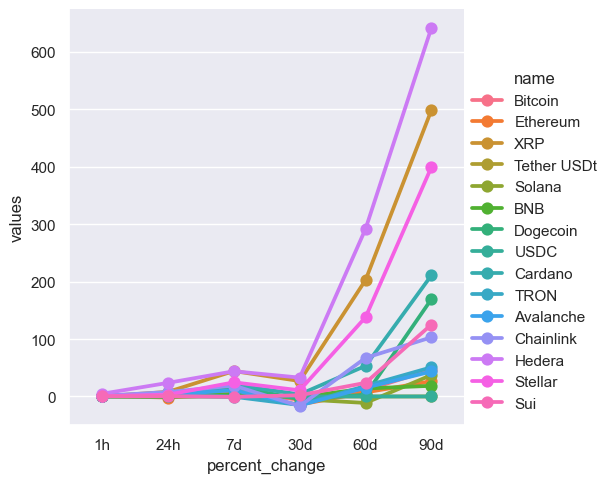

In [109]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [119]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11868,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19811118.00000,19811118.00000,False,NaN,1,NaN,NaN,None,2025-01-17T01:27:00.000Z,100232.35816,51413878022.91257,-13.39270,0.10569,0.34389,7.98086,-5.77383,10.79984,46.64723,1985715074944.32739,56.40640,2104879521379.39990,None,2025-01-17T01:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-16 19:28:54.305992
1,1027,Ethereum,ETH,ethereum,9834,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120498073.21434,120498073.21434,True,NaN,2,NaN,NaN,None,2025-01-17T01:28:00.000Z,3336.06454,25304265067.92600,-5.54910,0.79630,-1.87285,3.42355,-14.19666,7.08644,26.46126,401989349013.63940,11.41890,401989349013.64001,None,2025-01-17T01:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-16 19:28:54.305992
2,52,XRP,XRP,xrp,1509,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57564441898.00000,99986637553.00000,False,NaN,3,NaN,NaN,None,2025-01-17T01:28:00.000Z,3.26986,24048916927.82198,-1.56060,0.31633,7.99393,44.21940,26.83443,202.73570,498.48157,188227653749.76031,5.34680,326985978745.84998,None,2025-01-17T01:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-16 19:28:54.305992
3,825,Tether USDt,USDT,tether,113187,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,137460714171.48410,141435444739.60068,True,NaN,4,NaN,NaN,None,2025-01-17T01:27:00.000Z,0.99983,116494788846.31972,-8.70380,-0.02123,-0.02198,-0.00567,-0.02136,-0.01789,0.00316,137437630025.93788,3.90410,141411693106.91000,None,2025-01-17T01:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-16 19:28:54.305992
4,5426,Solana,SOL,solana,823,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,486496782.18187,592258662.35537,True,NaN,5,NaN,NaN,None,2025-01-17T01:28:00.000Z,212.33802,6105296692.40818,44.13500,0.99745,4.40493,13.93387,-4.73768,-11.29680,37.26574,103301763594.12459,2.93440,125759031849.74001,None,2025-01-17T01:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-16 19:28:54.305992
5,1839,BNB,BNB,bnb,2335,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144005900.82000,144005900.82000,False,NaN,6,NaN,NaN,None,2025-01-17T01:28:00.000Z,711.20101,1881494534.05414,1.25330,0.15562,-0.03312,3.89656,-1.19998,13.87152,18.54929,102417141744.48102,2.90930,102417141744.48000,None,2025-01-17T01:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-16 19:28:54.305992
6,74,Dogecoin,DOGE,dogecoin,1148,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147653926383.70520,147653926383.70520,True,NaN,7,NaN,NaN,None,2025-01-17T01:28:00.000Z,0.37801,3829020052.24179,-10.77040,0.53069,0.31279,17.04161,-4.38220,2.98334,169.37050,55814302922.35242,1.58550,55814302922.35000,None,2025-01-17T01:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-16 19:28:54.305992
7,3408,USDC,USDC,usd-coin,24779,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,46529321784.68142,46529321784.68142,False,NaN,8,NaN,NaN,None,2025-01-17T01:28:00.000Z,0.99997,8249892731.24399,-10.98810,-0.01017,0.01390,0.00457,-0.00707,0.00504,0.01319,46527933086.09359,1.32170,46527933086.09000,None,2025-01-17T01:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c

In [105]:
df11 = df10.query("name == 'Bitcoin'")
df11

,name,quote.USD.price,timestamp
0,Bitcoin,100232.35816,2025-01-16 19:28:54.305992


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

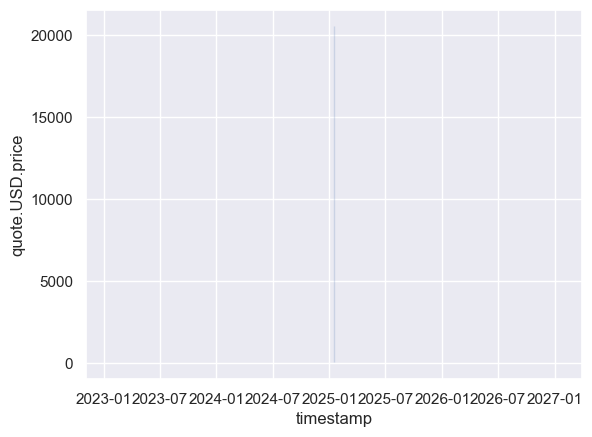

In [117]:
sns.set_theme(style = "darkgrid")
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df10)